# Initial Metrics of the Data

In [93]:
# import basic libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!pip install wordcloud

In [3]:
# loading data

ratings_data = pd.read_csv('ratings_small.csv.zip')
metadata = pd.read_csv('movies_metadata.csv.zip')
links_data = pd.read_csv('links.csv')

/tmp/ipykernel_54939/3465485731.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv.zip')


The columns obtained for each data frame are displayed below.

In [3]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


We can observe that metadata provides lots of information about each movie, giving us a lot of freedom when ploting and visualizing the data. Firstly, we should preprocess the data and do the corresponding mappings within the 3 dataframes.

Notice the following mappings and column relationships:

- The **movieId** column in *links_data* maps to the **movieId** column in *ratings_data*.

- The **imdbId** column in *links_data* maps to the **imdb_id** column in *metadata*.

#### Preprocessing the Metadata
In this next section, we preprocessed the data using the steps listed below. 

1. Removed rows from the metadata data frame where the imdb_id was null.
2. Convert each element of the imdb_id column in metadata to an int by applying a lambda function.
3. Merge metadata and links_data by joining the data frames on the imbd_id and imdbId columns respectively.


In [4]:
ratings_data['userId'] = ratings_data['userId'].astype('int32')

In [5]:
metadata = metadata[metadata['imdb_id'].notna()]

def remove_characters(string):
    
    return ''.join(filter(str.isdigit, string))
metadata['imdb_id'] = metadata['imdb_id'].apply(lambda x: int(remove_characters(str(x))))

In [6]:
full_metadata = pd.merge(metadata, links_data, left_on='imdb_id', right_on='imdbId')
full_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45383 entries, 0 to 45382
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45383 non-null  object 
 1   belongs_to_collection  4486 non-null   object 
 2   budget                 45383 non-null  object 
 3   genres                 45383 non-null  object 
 4   homepage               7765 non-null   object 
 5   id                     45383 non-null  object 
 6   imdb_id                45383 non-null  int64  
 7   original_language      45372 non-null  object 
 8   original_title         45383 non-null  object 
 9   overview               44433 non-null  object 
 10  popularity             45380 non-null  object 
 11  poster_path            45005 non-null  object 
 12  production_companies   45380 non-null  object 
 13  production_countries   45380 non-null  object 
 14  release_date           45302 non-null  object 
 15  re

'full_metadata' is a dataframe that can be used to retrieve the metadata for a movie based on the movie ID alone.

#### Creating a Spotlight Interactions Dataset

Spotlight has a dataset object that we need to use in order to train models on our data, called 'Interactions'. Below, we create an Interactions object by supplying the follownig parameters, all of wich must be Numpy arrays:

- **user_ids** - the user IDs in the rating data
- **item_ids** - the item IDs in the rating data
- **ratings** - the corresponding ratings in the rating data
- **timestamps (optional)** - the timestamps for each user/item interaction



In [63]:
from spotlight.interactions import Interactions

dataset = Interactions(user_ids= ratings_data['userId'].values,
                       item_ids= ratings_data['movieId'].values,
                       ratings = ratings_data['rating'].values,
                       timestamps= ratings_data['timestamp'].values)

#### Initial visualization of the data

In [64]:
full_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,imdbId,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,114709,862.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,113497,8844.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,113228,15602.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,114885,31357.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,113041,11862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,176269,6209470,439050.0
45379,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,176271,2028550,111109.0
45380,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,176273,303758,67758.0
45381,False,NaN,0,[],NaN,227506,8536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,[],Released,NaN,Satan Triumphant,False,0.0,0.0,176275,8536,227506.0


In [18]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int32  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int32(1), int64(2)
memory usage: 2.7 MB


In [19]:
full_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45383 entries, 0 to 45382
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45383 non-null  object 
 1   belongs_to_collection  4486 non-null   object 
 2   budget                 45383 non-null  object 
 3   genres                 45383 non-null  object 
 4   homepage               7765 non-null   object 
 5   id                     45383 non-null  object 
 6   imdb_id                45383 non-null  int64  
 7   original_language      45372 non-null  object 
 8   original_title         45383 non-null  object 
 9   overview               44433 non-null  object 
 10  popularity             45380 non-null  object 
 11  poster_path            45005 non-null  object 
 12  production_companies   45380 non-null  object 
 13  production_countries   45380 non-null  object 
 14  release_date           45302 non-null  object 
 15  re

In [85]:
full_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'movieId', 'imdbId', 'tmdbId'],
      dtype='object')

In [124]:
#full_metadata['tagline'] # what is tagline?

full_metadata['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45378    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45379                        [{'id': 18, 'name': 'Drama'}]
45380    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45381                                                   []
45382                                                   []
Name: genres, Length: 45383, dtype: object

plot ideas:

- ratings and production companies

- movies and their popularity and the rating they got --> done
- ratings and budget --> done

-  production companies and budget
- ratings and genres
- runtime and popularity
- popularity and original language
- something with release date

for wordclouds:
- the movie spoken language --> done
- popularity in genre --> done
- 

Let's see what is the best and worse rated movie by the general public

In [9]:
# merge metadata and ratings

meta_ratings = full_metadata.merge(ratings_data, left_on='movieId', right_on='movieId')
meta_ratings

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,movieId,imdbId,tmdbId,userId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1,114709,862.0,7,3.0,851866703
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1,114709,862.0,9,4.0,938629179
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1,114709,862.0,13,5.0,1331380058
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1,114709,862.0,15,2.0,997938310
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,1,114709,862.0,19,3.0,855190091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99773,False,"{'id': 286023, 'name': 'Sharknado Collection',...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://www.syfy.com/sharknado4,390989,4831420,en,Sharknado 4: The 4th Awakens,The new installment of the Sharknado franchise...,...,Sharknado 4: The 4th Awakens,False,4.3,88.0,161918,4831420,390989.0,624,1.5,1472929873
99774,False,NaN,8000000,"[{'id': 18, 'name': 'Drama'}]",NaN,159550,255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,...,The Last Brickmaker in America,False,7.0,1.0,161944,255313,159550.0,287,5.0,1470167824
99775,False,NaN,1000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 10749,...",NaN,392572,5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",...,Rustom,False,7.3,25.0,162542,5165344,392572.0,611,5.0,1471520667
99776,False,NaN,15050000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,402672,3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",...,Mohenjo Daro,False,6.7,26.0,162672,3859980,402672.0,611,3.0,1471523986


In [10]:
meta_ratings2 = meta_ratings[['rating', 'title']]
print(meta_ratings2)

       rating                                              title
0         3.0                                          Toy Story
1         4.0                                          Toy Story
2         5.0                                          Toy Story
3         2.0                                          Toy Story
4         3.0                                          Toy Story
...       ...                                                ...
99773     1.5                       Sharknado 4: The 4th Awakens
99774     5.0                     The Last Brickmaker in America
99775     5.0                                             Rustom
99776     3.0                                       Mohenjo Daro
99777     5.0  The Beatles: Eight Days a Week - The Touring Y...

[99778 rows x 2 columns]


In [11]:
# Group by title and calculate the mean rating for each title
mean_ratings = meta_ratings2.groupby('title')['rating'].mean().reset_index()
mean_ratings['rating'] = mean_ratings['rating']
mean_ratings

,title,rating
0,$9.99,3.833333
1,'Neath the Arizona Skies,0.500000
2,"'night, Mother",5.000000
3,(500) Days of Summer,3.755556
4,...And God Created Woman,5.000000
...,...,...
8733,À Nous la Liberté,4.500000
8734,Æon Flux,2.538462
8735,İtirazım Var,3.500000
8736,Želary,5.000000


In [12]:
# Sort the DataFrame by mean rating (optional but recommended)
mean_ratings = mean_ratings.sort_values(by='rating')
mean_ratings

,title,rating
6018,Superbabies: Baby Geniuses 2,0.5
3937,Malibu's Most Wanted,0.5
6734,The First Day of the Rest of Your Life,0.5
3906,Madea Goes to Jail,0.5
4816,Peter & the Wolf,0.5
...,...,...
719,Bang Bang You're Dead,5.0
6664,The Edge of Heaven,5.0
6661,The Earrings of Madame de...,5.0
6676,The End,5.0


In [13]:
print('There are',len(mean_ratings[mean_ratings['rating'] == 5]), 'movies rated in mean score of top value 5.')

print('There are ', len(mean_ratings[mean_ratings['rating'] <= 0.5]), 'movies rated with a mean score less than 0.5')

There are 300 movies rated in mean score of top value 5.
There are  89 movies rated with a mean score less than 0.5


Let's see metrics based on production companies

In [25]:
meta_ratings = meta_ratings[['rating', 'title', 'production_companies']]
print(meta_ratings)
# Group by title and calculate the mean rating for each title
mean_ratings = meta_ratings.groupby('title')['rating'].mean().reset_index()
mean_ratings = pd.merge(mean_ratings, meta_ratings[['title', 'production_companies']], on= 'title')

       rating                                              title  \
0         3.0                                          Toy Story   
1         4.0                                          Toy Story   
2         5.0                                          Toy Story   
3         2.0                                          Toy Story   
4         3.0                                          Toy Story   
...       ...                                                ...   
99773     1.5                       Sharknado 4: The 4th Awakens   
99774     5.0                     The Last Brickmaker in America   
99775     5.0                                             Rustom   
99776     3.0                                       Mohenjo Daro   
99777     5.0  The Beatles: Eight Days a Week - The Touring Y...   

                                    production_companies  
0         [{'name': 'Pixar Animation Studios', 'id': 3}]  
1         [{'name': 'Pixar Animation Studios', 'id': 3}]  
2     

In [16]:
import ast

mean_ratings['production_companies'] = mean_ratings['production_companies'].apply(ast.literal_eval)
print(mean_ratings)

mean_ratings['production_companies_name'] = mean_ratings['production_companies'].apply(lambda x: x['name'])

print(mean_ratings)

KeyError: 'production_companies'

In [41]:
import json


# Define a function to extract the 'name' value
def extract_name(json_string):
    json_string_valid = json_string.replace("'", '"')
    data = json.loads(json_string_valid)
    return [entry.get('name', '') for entry in data] if data else []
    #return data[0].get('name', '') if data else ''

# Apply the function to the DataFrame column

mean_ratings['production_companies_name'] = mean_ratings['production_companies'].apply(extract_name)


# Print the result
print(mean_ratings['production_companies_name'].values[0])


JSONDecodeError: Expecting ',' delimiter: line 1 column 21 (char 20)

#### Relationship between Mean Rating and Popularity of movies

In [32]:
meta_ratings = full_metadata

In [19]:
meta_ratings2 = meta_ratings[['vote_average', 'popularity', 'title']]

meta_ratings2 = meta_ratings2.drop_duplicates(subset=['title'], ignore_index=True)

print(meta_ratings2)

meta_ratings2['vote_average'] = meta_ratings2['vote_average'].astype(float)
meta_ratings2['popularity'] = meta_ratings2['popularity'].astype(float)


       vote_average popularity                        title
0               7.7  21.946943                    Toy Story
1               6.9  17.015539                      Jumanji
2               6.5    11.7129             Grumpier Old Men
3               6.1   3.859495            Waiting to Exhale
4               5.7   8.387519  Father of the Bride Part II
...             ...        ...                          ...
42210           3.5   0.661558              Caged Heat 3000
42211           4.0   0.072051                       Subdue
42212           9.0   0.178241          Century of Birthing
42213           0.0   0.003503             Satan Triumphant
42214           0.0   0.163015                     Queerama

[42215 rows x 3 columns]


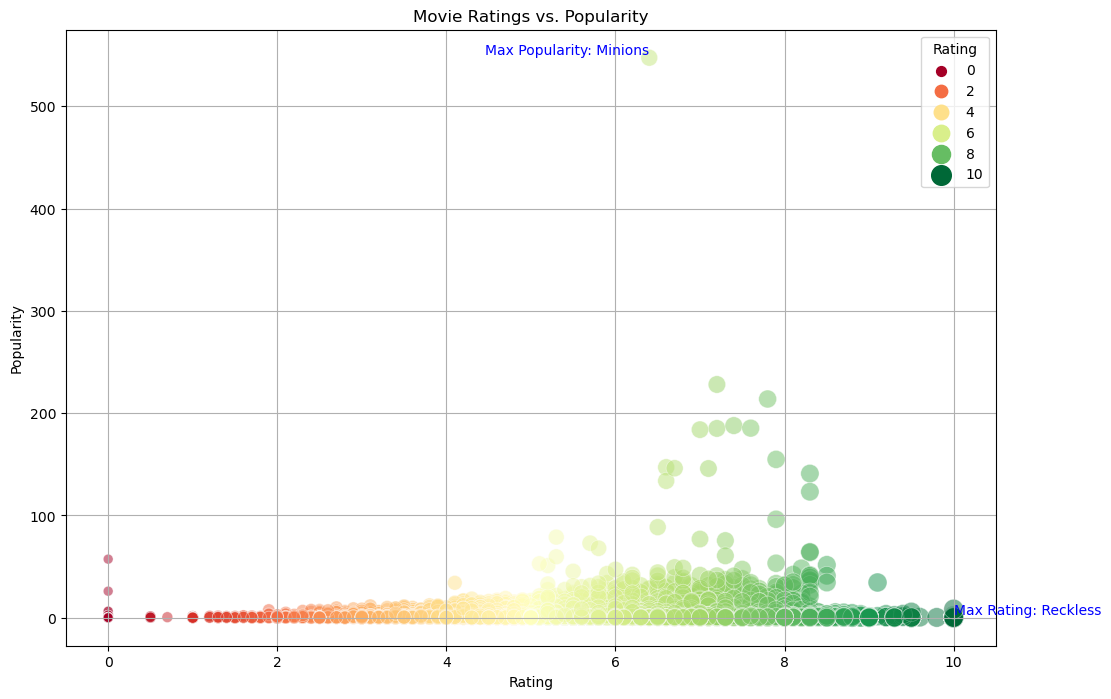

In [20]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping
scatter = sns.scatterplot(x='vote_average', y='popularity', data=meta_ratings2, 
                          hue='vote_average', palette='RdYlGn', size='vote_average', sizes=(50, 200),
                          alpha=0.5, edgecolor='w', linewidth=0.5)


# Find movies with maximum rating and popularity
max_rating_movie = meta_ratings2.loc[meta_ratings2['vote_average'].idxmax(), 'title']
max_popularity_movie = meta_ratings2.loc[meta_ratings2['popularity'].idxmax(), 'title']
max_rating_coords = (meta_ratings2['vote_average'].max(), meta_ratings2['popularity'].loc[meta_ratings2['vote_average'].idxmax()])
max_popularity_coords = (meta_ratings2['vote_average'].loc[meta_ratings2['popularity'].idxmax()],
                         meta_ratings2['popularity'].max())

# Annotate the plot with labels for max rating and popularity

plt.text(*max_popularity_coords, f'Max Popularity: {max_popularity_movie}', 
         fontsize=10, color='blue', ha='right', va='bottom')
plt.text(*max_rating_coords, f'Max Rating: {max_rating_movie}', 
         fontsize=10, color='blue', ha='left', va='bottom')

# Set labels and title
plt.title('Movie Ratings vs. Popularity')
plt.xlabel('Rating')
plt.ylabel('Popularity')

# Add legend
legend = plt.legend()
legend.set_title('Rating')

plt.grid(True)
plt.show()

From the plot we can observe that having more popularity does not mean having best ratings. Although we can see that the more popular the movie, the best rating it can get, they are not mutually exclusive.

#### Relationship between Budget and Popularity of movies

In [15]:
meta_ratings2 = meta_ratings[['budget', 'popularity', 'title']]

meta_ratings2 = meta_ratings2.drop_duplicates(subset=['title'], ignore_index=True)

print(meta_ratings2)

meta_ratings2['budget'] = meta_ratings2['budget'].astype(float)
meta_ratings2['popularity'] = meta_ratings2['popularity'].astype(float)

         budget popularity                        title
0      30000000  21.946943                    Toy Story
1      65000000  17.015539                      Jumanji
2             0    11.7129             Grumpier Old Men
3      16000000   3.859495            Waiting to Exhale
4             0   8.387519  Father of the Bride Part II
...         ...        ...                          ...
42210         0   0.661558              Caged Heat 3000
42211         0   0.072051                       Subdue
42212         0   0.178241          Century of Birthing
42213         0   0.003503             Satan Triumphant
42214         0   0.163015                     Queerama

[42215 rows x 3 columns]


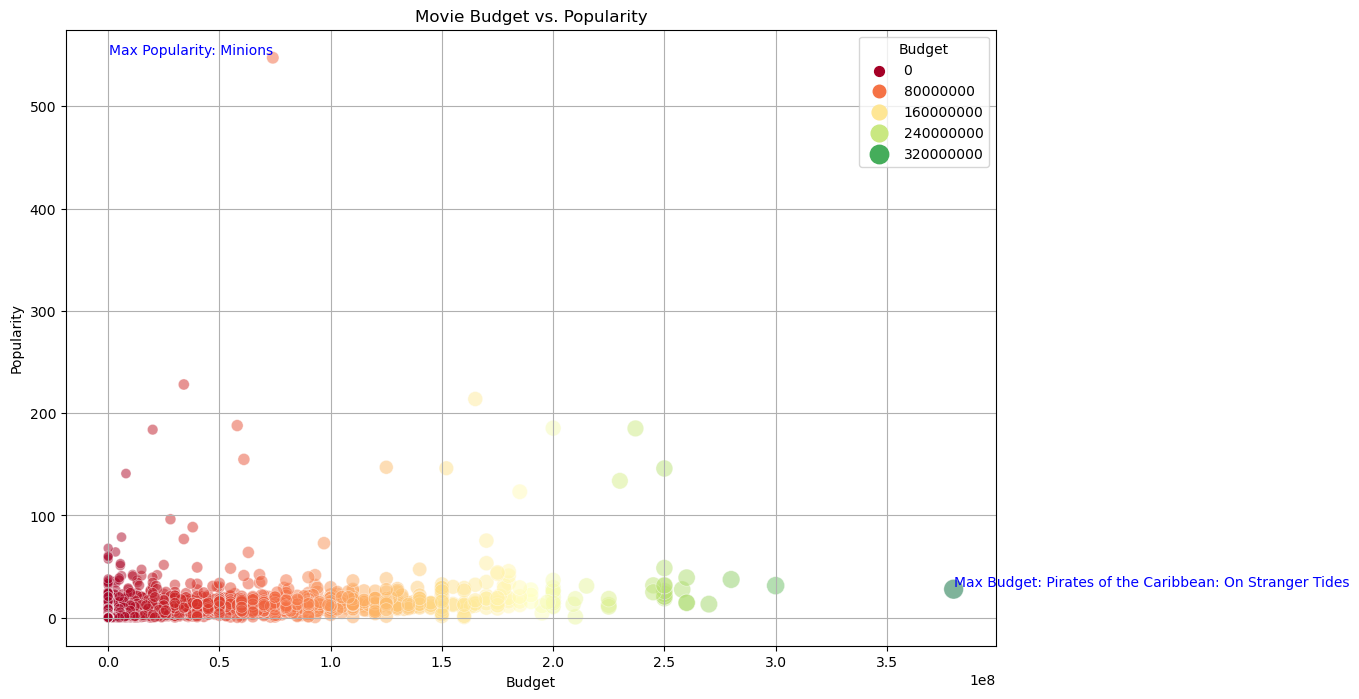

In [16]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping
scatter = sns.scatterplot(x='budget', y='popularity', data=meta_ratings2, 
                          hue='budget', palette='RdYlGn', size='budget', sizes=(50, 200),
                          alpha=0.5, edgecolor='w', linewidth=0.5)


# Find movies with maximum rating and popularity
max_rating_movie = meta_ratings2.loc[meta_ratings2['budget'].idxmax(), 'title']
max_popularity_movie = meta_ratings2.loc[meta_ratings2['popularity'].idxmax(), 'title']
max_rating_coords = (meta_ratings2['budget'].max(), meta_ratings2['popularity'].loc[meta_ratings2['budget'].idxmax()])
max_popularity_coords = (meta_ratings2['budget'].loc[meta_ratings2['popularity'].idxmax()],
                         meta_ratings2['popularity'].max())


# Annotate the plot with labels for max rating and popularity

plt.text(*max_popularity_coords, f'Max Popularity: {max_popularity_movie}', 
         fontsize=10, color='blue', ha='right', va='bottom')
plt.text(*max_rating_coords, f'Max Budget: {max_rating_movie}', 
         fontsize=10, color='blue', ha='left', va='bottom')


# Set labels and title
plt.title('Movie Budget vs. Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')

# Add legend
legend = plt.legend()
legend.set_title('Budget')

plt.grid(True)
plt.show()

As we can see in the scatter plot,  there is a big distinction in the budget of movies. But once again, more budget does not mean more popularity, in fact, 'Minions' which is the most popular movie has a much smaller budget than 'Pirates of the Caribbean: On Stranger Tides'.

#### Relationship between Mean Rating and Budget of movies

In [94]:
meta_ratings2 = meta_ratings[['budget', 'vote_average', 'title']]

meta_ratings2 = meta_ratings2.drop_duplicates(subset=['title'], ignore_index=True)

print(meta_ratings2)

meta_ratings2['budget'] = meta_ratings2['budget'].astype(float)
meta_ratings2['vote_average'] = meta_ratings2['vote_average'].astype(float)

        budget  vote_average  \
0     30000000           7.7   
1     65000000           6.9   
2            0           6.5   
3     16000000           6.1   
4            0           5.7   
...        ...           ...   
8733         0           4.3   
8734   8000000           7.0   
8735   1000000           7.3   
8736  15050000           6.7   
8737         0           7.6   

                                                  title  
0                                             Toy Story  
1                                               Jumanji  
2                                      Grumpier Old Men  
3                                     Waiting to Exhale  
4                           Father of the Bride Part II  
...                                                 ...  
8733                       Sharknado 4: The 4th Awakens  
8734                     The Last Brickmaker in America  
8735                                             Rustom  
8736                               

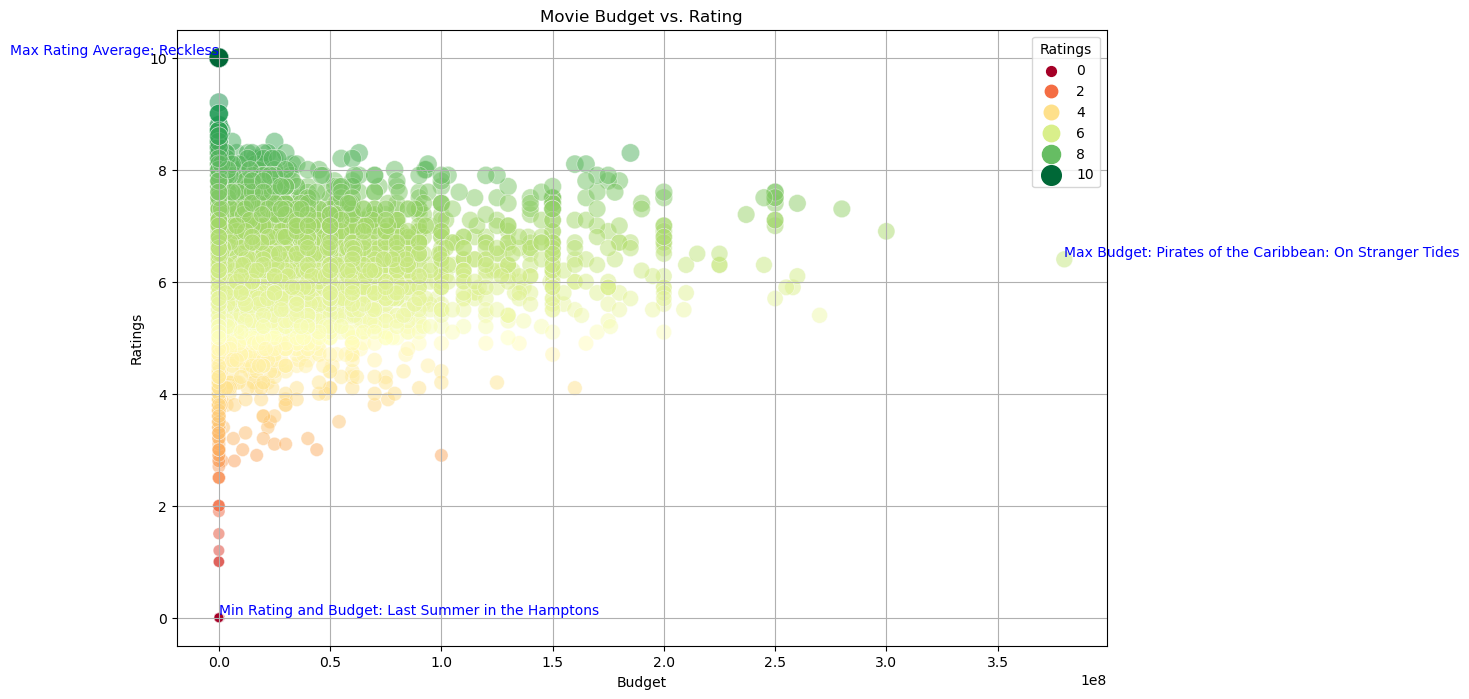

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping
scatter = sns.scatterplot(x='budget', y='vote_average', data=meta_ratings2, 
                          hue='vote_average', palette='RdYlGn', size='vote_average', sizes=(50, 200),
                          alpha=0.5, edgecolor='w', linewidth=0.5)

# Find movies with maximum rating and popularity
max_rating_movie = meta_ratings2.loc[meta_ratings2['budget'].idxmax(), 'title']
max_popularity_movie = meta_ratings2.loc[meta_ratings2['vote_average'].idxmax(), 'title']
min_popularity_movie = meta_ratings2.loc[meta_ratings2['vote_average'].idxmin(), 'title']
min_rating_movie = meta_ratings2.loc[meta_ratings2['budget'].idxmin(), 'title']
max_rating_coords = (meta_ratings2['budget'].max(), meta_ratings2['vote_average'].loc[meta_ratings2['budget'].idxmax()])
max_popularity_coords = (meta_ratings2['budget'].loc[meta_ratings2['vote_average'].idxmax()],
                         meta_ratings2['vote_average'].max())
min_rating_coords = (meta_ratings2['budget'].min(), meta_ratings2['vote_average'].loc[meta_ratings2['budget'].idxmin()])
min_popularity_coords = (meta_ratings2['budget'].loc[meta_ratings2['vote_average'].idxmin()],
                         meta_ratings2['vote_average'].min())
# Annotate the plot with labels for max rating and popularity
plt.text(*max_popularity_coords, f'Max Rating Average: {max_popularity_movie}', 
         fontsize=10, color='blue', ha='right', va='bottom')
plt.text(*max_rating_coords, f'Max Budget: {max_rating_movie}', 
         fontsize=10, color='blue', ha='left', va='bottom')
plt.text(*min_popularity_coords, f'Min Rating and Budget: {min_popularity_movie}', 
         fontsize=10, color='blue', ha='left', va='bottom')



# Set labels and title
plt.title('Movie Budget vs. Rating')
plt.xlabel('Budget')
plt.ylabel('Ratings')

# Add legend
legend = plt.legend()
legend.set_title('Ratings')

plt.grid(True)
plt.show()


In this case, when ploting the relationship between budget and ratgins, we can see that the best rated movie, 'Reckles' has a very low budget. Although is not the best, the highest budget movie is not rated too low.

Now, lets plot some correlations based on the gender of the movie

In [86]:
meta_genres = full_metadata.merge(ratings_data, left_on='movieId', right_on='movieId')

In [67]:
meta_genres['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
2        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
3        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
4        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
                               ...                        
99773    [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...
99774                        [{'id': 18, 'name': 'Drama'}]
99775    [{'id': 53, 'name': 'Thriller'}, {'id': 10749,...
99776    [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...
99777    [{'id': 99, 'name': 'Documentary'}, {'id': 104...
Name: genres, Length: 99778, dtype: object

/tmp/ipykernel_4571/3371945983.py:26: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genre_counts = meta_genres[all_genre_names].sum()


<Axes: title={'center': 'Number of Movies in Each Genre'}, xlabel='Genre', ylabel='Number of Movies'>

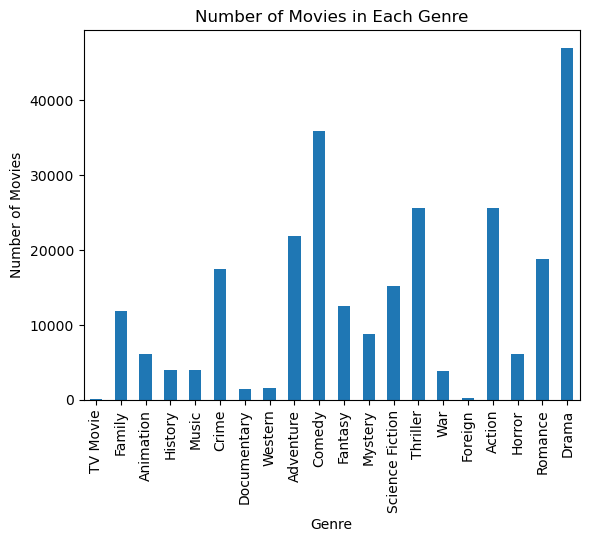

In [68]:
import ast

# If the 'genres' column contains string representations of lists, use ast.literal_eval to convert them to actual lists
meta_genres['genres'] = meta_genres['genres'].apply(ast.literal_eval)

# Create a list to store all unique genre IDs
all_genre_names = set()

# Extract all unique genre IDs from the 'genres' column
for genres_list in meta_genres['genres']:
    for genre in genres_list:
        all_genre_names.add(genre['name'])

# Create a new column for each genre name and initialize it with zeros
for genre_name in all_genre_names:
    meta_genres[genre_name] = 0

# Update the genre columns based on the information in the 'genres' column
for index, row in meta_genres.iterrows():
    genres_list = row['genres']
    for genre in genres_list:
        genre_name = genre['name']
        meta_genres.at[index, genre_name] += 1

# Now, you can plot the genre counts
genre_counts = meta_genres[all_genre_names].sum()

# Plot the genre counts
genre_counts.plot(kind='bar', xlabel='Genre', ylabel='Number of Movies', title='Number of Movies in Each Genre')

We could say that we have to take into account that there are many more Drama movies. When training we should ensure the model is not biased towards this, if we end up using 'genre' as a learning feature.

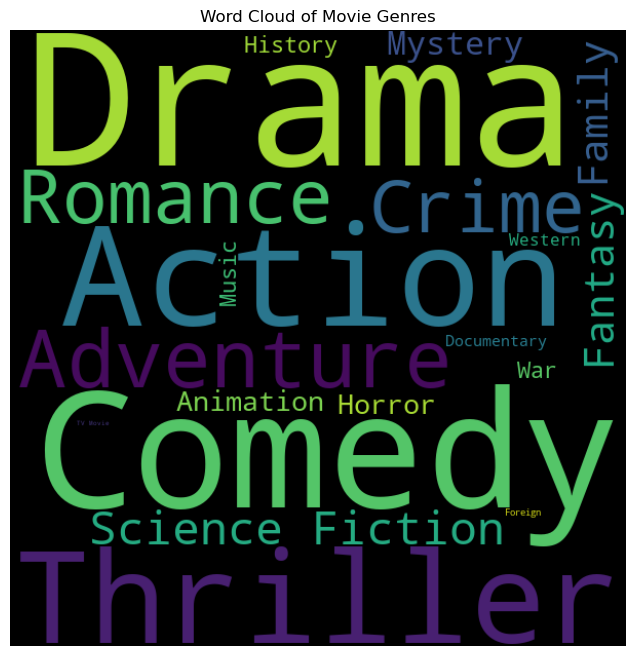

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
from collections import Counter

# Assuming 'genres' column contains string representations of lists, convert them to actual lists
meta_genres['genres'] = meta_genres['genres'].apply(ast.literal_eval)

# Create a list to store all unique genre names
all_genre_names = set()

# Extract all unique genre names from the 'genres' column
for genres_list in meta_genres['genres']:
    for genre in genres_list:
        all_genre_names.add(genre['name'])

# Create a new column for each genre name and initialize it with zeros
for genre_name in all_genre_names:
    meta_genres[genre_name] = 0

# Update the genre columns based on the information in the 'genres' column
for index, row in meta_genres.iterrows():
    genres_list = row['genres']
    for genre in genres_list:
        genre_name = genre['name']
        meta_genres.at[index, genre_name] += 1

# Count the frequency of each genre
genre_counts = Counter({genre: meta_genres[genre].sum() for genre in all_genre_names})

# Create a WordCloud object
wordcloud = WordCloud(width=600, height=600, background_color='black')

# Generate the WordCloud from the genre counts with larger font size
wordcloud.generate_from_frequencies(genre_counts)

# Plot the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')
plt.show()


#### Plotting the popularity of the genre

In [23]:
meta_genres = full_metadata.merge(ratings_data, left_on='movieId', right_on='movieId')

/tmp/ipykernel_54939/3619508271.py:49: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = StandardScaler().fit_transform(meta_genres[all_genre_names])
/tmp/ipykernel_54939/3619508271.py:66: UserWarning: 
The palette list has fewer values (20) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='PC1', y='PC2', hue='genre', data=pc_df, palette=palette, legend='full')


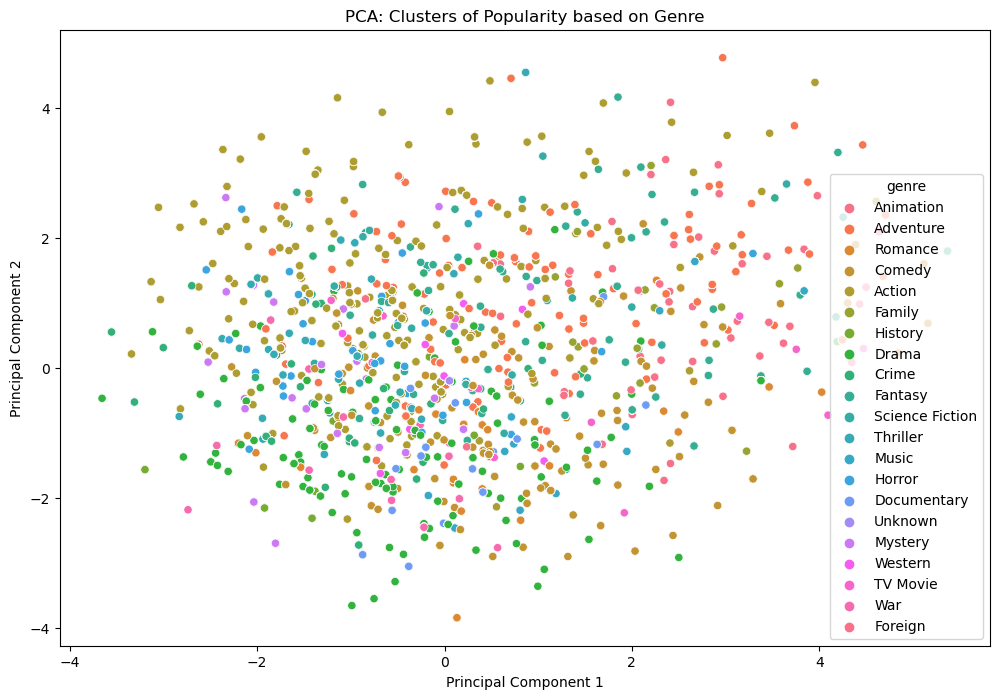

In [24]:
import ast
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# If the 'genres' column contains string representations of lists, use ast.literal_eval to convert them to actual lists
meta_genres['genres'] = meta_genres['genres'].apply(ast.literal_eval)

# Create a list to store all unique genre names
all_genre_names = set()

# Extract all unique genre names from the 'genres' column
for genres_list in meta_genres['genres']:
    for genre in genres_list:
        all_genre_names.add(genre['name'])

# Create a new column for each genre name and initialize it with zeros
for genre_name in all_genre_names:
    meta_genres[genre_name] = 0


# Update the genre columns based on the information in the 'genres' column
for index, row in meta_genres.iterrows():
    genres_list = row['genres']
    for genre in genres_list:
        genre_name = genre['name']
        meta_genres.at[index, genre_name] += 1

'''
# Create a new column for popularity counts and initialize it with zeros
meta_genres['popularity_count'] = 0

# Update the popularity count based on the information in the 'popularity' column
for index, row in meta_genres.iterrows():
    genres_list = row['genres']
    for genre in genres_list:
        genre_name = genre['name']
        popularity = row['popularity']
        # Check for non-numeric values and handle NaN values
        if isinstance(popularity, (int, float)) and not pd.isna(popularity):
            meta_genres.at[index, 'popularity_count'] += popularity
'''


# Now, you can fit a multivariate regression model
# Standardize the data
# Standardize the data
X = StandardScaler().fit_transform(meta_genres[all_genre_names])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame for visualization
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add a 'genre' column to the DataFrame
pc_df['genre'] = meta_genres['genres'].apply(lambda x: x[0]['name'] if x else 'Unknown')

# Create a color map for each genre
palette = sns.color_palette("husl", len(all_genre_names))

# Plot the clusters with color based on genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='genre', data=pc_df, palette=palette, legend='full')
plt.title('PCA: Clusters of Popularity based on Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

I don't think this PCA is explainable at all. Delete it ?

In [39]:
meta_ratings = full_metadata.merge(ratings_data, left_on='movieId', right_on='movieId')

meta_ratings2 = meta_ratings[['adult', 'budget', 'popularity', 'title']]

meta_ratings2 = meta_ratings2.drop_duplicates(subset=['title'], ignore_index=True)

print(meta_ratings2)

meta_ratings2['budget'] = meta_ratings2['budget'].astype(float)
meta_ratings2['popularity'] = meta_ratings2['popularity'].astype(float)

      adult    budget popularity  \
0     False  30000000  21.946943   
1     False  65000000  17.015539   
2     False         0    11.7129   
3     False  16000000   3.859495   
4     False         0   8.387519   
...     ...       ...        ...   
8733  False         0   4.574494   
8734  False   8000000   0.038998   
8735  False   1000000   7.333139   
8736  False  15050000   1.423358   
8737  False         0   7.078301   

                                                  title  
0                                             Toy Story  
1                                               Jumanji  
2                                      Grumpier Old Men  
3                                     Waiting to Exhale  
4                           Father of the Bride Part II  
...                                                 ...  
8733                       Sharknado 4: The 4th Awakens  
8734                     The Last Brickmaker in America  
8735                                         

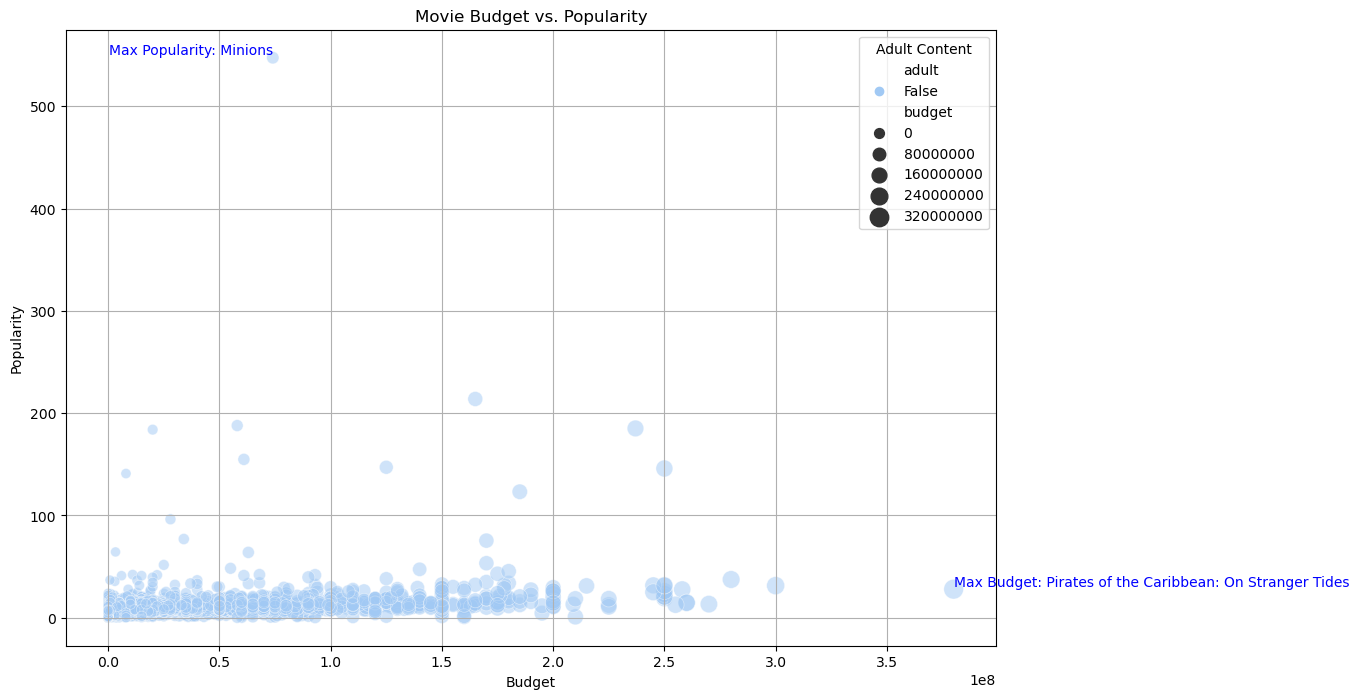

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot with color mapping based on 'adult' column
scatter = sns.scatterplot(x='budget', y='popularity', data=meta_ratings2, 
                          hue='adult', palette='pastel', size='budget', sizes=(50, 200),
                          alpha=0.5, edgecolor='w', linewidth=0.5)

# Find movies with maximum rating and popularity
max_rating_movie = meta_ratings2.loc[meta_ratings2['budget'].idxmax(), 'title']
max_popularity_movie = meta_ratings2.loc[meta_ratings2['popularity'].idxmax(), 'title']
max_rating_coords = (meta_ratings2['budget'].max(), meta_ratings2['popularity'].loc[meta_ratings2['budget'].idxmax()])
max_popularity_coords = (meta_ratings2['budget'].loc[meta_ratings2['popularity'].idxmax()],
                         meta_ratings2['popularity'].max())

# Annotate the plot with labels for max rating and popularity
plt.text(*max_popularity_coords, f'Max Popularity: {max_popularity_movie}', 
         fontsize=10, color='blue', ha='right', va='bottom')
plt.text(*max_rating_coords, f'Max Budget: {max_rating_movie}', 
         fontsize=10, color='blue', ha='left', va='bottom')

# Set labels and title
plt.title('Movie Budget vs. Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')

# Add legend
legend = plt.legend()
legend.set_title('Adult Content')

plt.grid(True)
plt.show()


In [46]:
meta_ratings2['adult'][meta_ratings2['adult'] == 'True']

Series([], Name: adult, dtype: object)

As we can see from the plot, ALL entries of Adult are 'False', this means that the column is non-informative.

In [34]:
meta_genres = full_metadata.merge(ratings_data, left_on='movieId', right_on='movieId')

In [35]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called meta_genres and the column containing genre information is 'genres'
def safe_literal_eval(value):
    try:
        return ast.literal_eval(value)
    except (SyntaxError, ValueError):
        return None

# Apply safe_literal_eval to convert the 'genres' column
meta_genres['genres'] = meta_genres['genres'].apply(ast.literal_eval)

# Create a list to store all unique genre names
all_genre_names = set()

# Extract all unique genre names from the 'genres' column
for genres_list in meta_genres['genres']:
    for genre in genres_list:
        all_genre_names.add(genre['name'])

# Create a list to store DataFrames for each movie-genre combination
dfs = []

# Iterate over each row and create a DataFrame for each genre
for index, row in meta_genres.iterrows():
    movie_id = index
    popularity = row['popularity']
    vote_average = row['vote_average']
    genres_list = row['genres']
    
    # Create a DataFrame for the current movie-genre combination
    df_genre_movie = pd.DataFrame({'movie_id': [movie_id]*len(genres_list),
                                   'popularity': [popularity]*len(genres_list),
                                   'vote_average': [vote_average]*len(genres_list),
                                   'genre': [genre['name'] for genre in genres_list]})
    
    # Append the DataFrame to the list
    dfs.append(df_genre_movie)

# Concatenate all DataFrames into a single DataFrame
df_genre_movie = pd.concat(dfs, ignore_index=True)

# Plot the scatter plot with color based on genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='vote_average', hue='genre', data=df_genre_movie, palette='husl', size='popularity', sizes=(20, 200))
plt.title('Scatter Plot of Popularity and Vote Average with Color Based on Genre')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


KeyboardInterrupt: 

#### Word cloud of spoken languages

In [53]:
meta_ratings = full_metadata.merge(ratings_data, left_on='movieId', right_on='movieId')
meta_ratings['spoken_languages']

0        [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}]
2        [{'iso_639_1': 'en', 'name': 'English'}]
3        [{'iso_639_1': 'en', 'name': 'English'}]
4        [{'iso_639_1': 'en', 'name': 'English'}]
                           ...                   
99773    [{'iso_639_1': 'en', 'name': 'English'}]
99774                                          []
99775     [{'iso_639_1': 'hi', 'name': 'हिन्दी'}]
99776     [{'iso_639_1': 'hi', 'name': 'हिन्दी'}]
99777    [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 99778, dtype: object

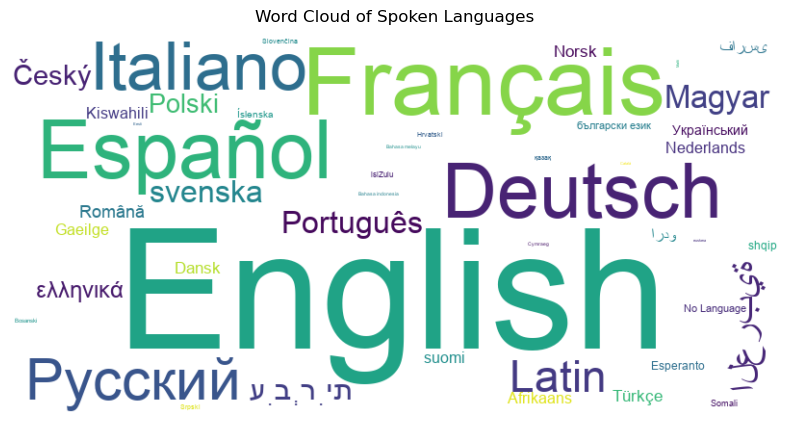

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'spoken_languages' is the column containing language information in your DataFrame
spoken_languages = meta_genres['spoken_languages']

# Flatten the list of dictionaries and extract language names
languages_list = [lang['name'] for movie_languages in spoken_languages.dropna() for lang in eval(movie_languages)]

# Count the frequency of each language
language_counts = Counter(languages_list)

# Exclude words with problematic characters (customize this filter based on your font and character requirements)
filtered_language_counts = {word: count for word, count in language_counts.items() if all(ord(char) < 128*18 for char in word)}

# Use the default font (typically available on most systems)
# If you encounter issues, you may need to install additional fonts on your system
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='Arial').generate_from_frequencies(filtered_language_counts)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spoken Languages')
plt.show()

